In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./fake_job_postings.csv',  engine = 'python')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
del df['job_id']
del df['salary_range']

In [4]:
df.fillna(" ",inplace = True)
df['textdata'] = df['title'] + ' ' + df['location'] + ' ' + df['department'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits'] + ' ' + df['employment_type'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' + df['function'] 

In [5]:
del df['title']
del df['location']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['employment_type']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']

In [6]:
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,textdata
0,0,1,0,0,"Marketing Intern US, NY, New York Marketing We..."
1,0,1,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,1,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotS..."


In [7]:
import re

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\supriti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stop = set(stopwords.words('english'))
len(stop)

179

In [9]:
import string

In [10]:
punctuation = list(string.punctuation)
stop.update(punctuation)

In [11]:
def cleaner(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can't", 'can not', phrase)
    phrase = re.sub(r"n\'t"," not", phrase)
    phrase = re.sub(r"\'re'"," are", phrase)
    phrase = re.sub(r"\'s"," is", phrase)
    phrase = re.sub(r"\'ll"," will", phrase)
    phrase = re.sub(r"\'d"," would", phrase)
    phrase = re.sub(r"\'t"," not", phrase)
    phrase = re.sub(r"\'ve"," have", phrase)
    phrase = re.sub(r"\'m"," am", phrase)   
    return phrase

In [12]:
from bs4 import BeautifulSoup
from tqdm import tqdm

In [13]:
cleaned_title = []

for sentance in tqdm(df['textdata'].values):
    sentance = str(sentance)
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = cleaner(sentance)
    sentance = re.sub(r'[?|!|\'|"|#|+]', r'', sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stop)
    cleaned_title.append(sentance.strip())

100%|██████████| 17880/17880 [00:21<00:00, 834.75it/s] 


In [14]:
df['textdata'] = cleaned_title
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,textdata
0,0,1,0,0,marketing intern us ny new york marketing crea...
1,0,1,0,0,customer service cloud video production nz auc...
2,0,1,0,0,commissioning machinery assistant cma us ia we...
3,0,1,0,0,account executive washington dc us dc washingt...
4,0,1,1,0,bill review manager us fl fort worth spotsourc...


In [15]:
from wordcloud import WordCloud

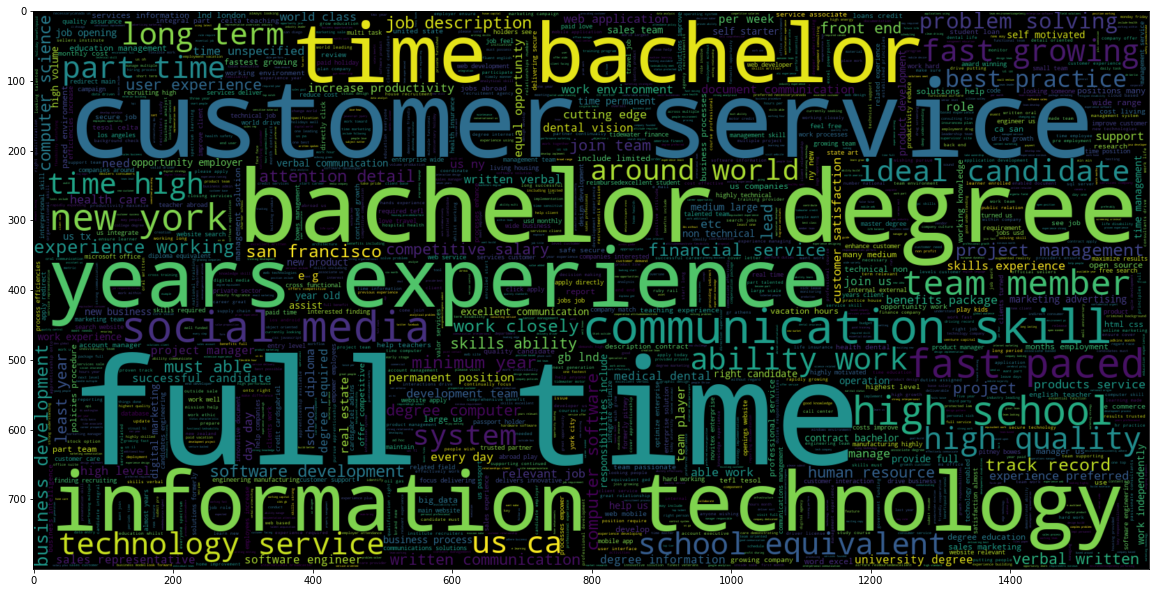

In [16]:
plt.figure(figsize = (20,20)) # This figure is representing the text data that is not fraudulent(0)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.fraudulent == 0].textdata))
plt.imshow(wc , interpolation = 'bilinear')

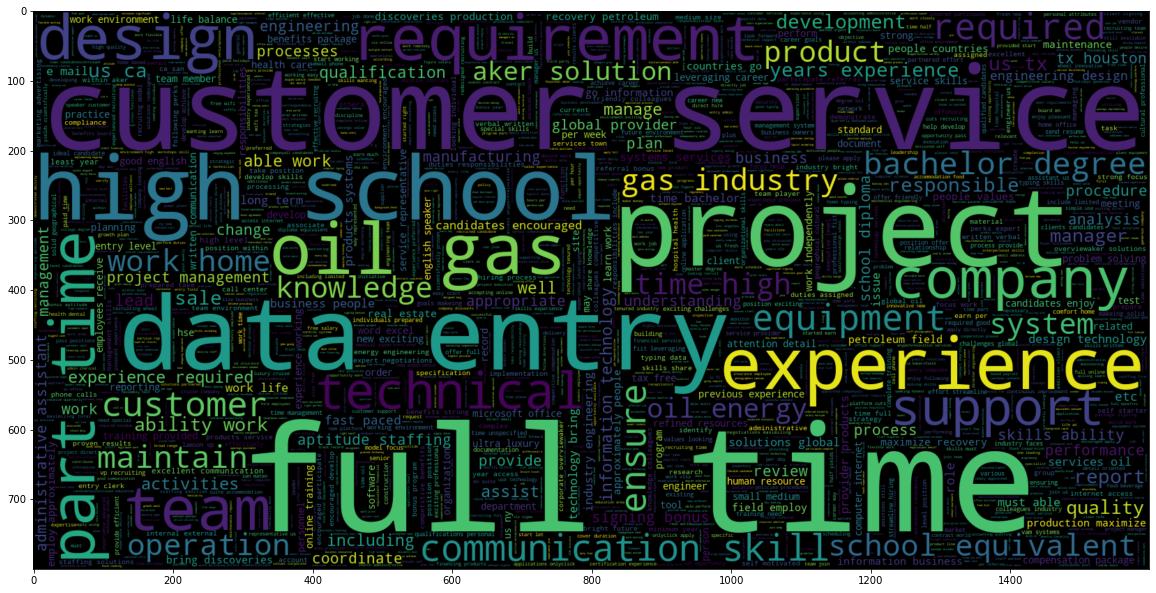

In [17]:
plt.figure(figsize = (20,20)) # This figure is representing the text data that is not fraudulent(1)
wc = WordCloud(width = 1600 , height = 800 , max_words = 3000).generate(" ".join(df[df.fraudulent == 1].textdata))
plt.imshow(wc , interpolation = 'bilinear')

In [18]:
import seaborn as sns

<AxesSubplot:xlabel='fraudulent', ylabel='count'>

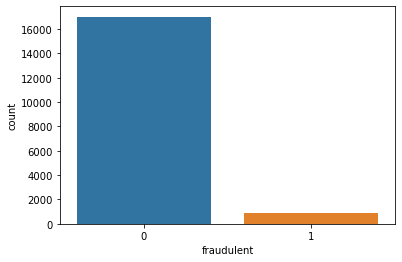

In [19]:
sns.countplot(x = "fraudulent", data=df)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_Train, X_test, y_Train, y_test = train_test_split(df.textdata, df.fraudulent, random_state=0, stratify=df.fraudulent, test_size=0.1)
X_Train.shape

(16092,)

In [22]:
X_train, X_cross, y_train, y_cross = train_test_split(X_Train, y_Train, random_state=0, stratify=y_Train, test_size=0.1)
y_train.shape

(14482,)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3)) # transformed train reviews
tv_train_reviews=tv.fit_transform(X_train) # transformed test reviews
tv_cross_reviews=tv.transform(X_cross)
tv_test_reviews=tv.transform(X_test)

print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_cross_reviews.shape)

Tfidf_train: (14482, 1633270)
Tfidf_test: (1610, 1633270)


In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

In [26]:
alpha_set=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
Train_AUC_BOW = []
CrossVal_AUC_BOW = []
for i in alpha_set:
    naive_b=MultinomialNB(alpha=i)
    naive_b.fit(tv_train_reviews, y_train)
    Train_y_pred =  naive_b.predict(tv_train_reviews)
    Train_AUC_BOW.append(roc_auc_score(y_train,Train_y_pred))
    CrossVal_y_pred =  naive_b.predict(tv_cross_reviews)
    CrossVal_AUC_BOW.append(roc_auc_score(y_cross,CrossVal_y_pred))

In [27]:
from numpy import math

In [28]:
Alpha_set=[]
for i in range(len(alpha_set)):
    Alpha_set.append(math.log(alpha_set[i]))

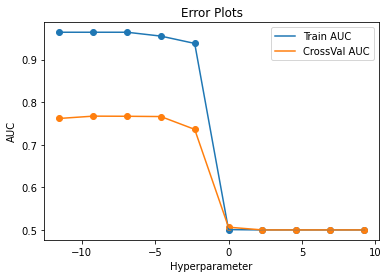

In [29]:
plt.plot(Alpha_set, Train_AUC_BOW, label='Train AUC')
plt.scatter(Alpha_set, Train_AUC_BOW)
plt.plot(Alpha_set, CrossVal_AUC_BOW, label='CrossVal AUC')
plt.scatter(Alpha_set, CrossVal_AUC_BOW)
plt.legend()
plt.xlabel("Hyperparameter")
plt.ylabel("AUC")
plt.title("Error Plots")
plt.show()

In [30]:
optimal_alpha=alpha_set[CrossVal_AUC_BOW.index(max(CrossVal_AUC_BOW))]
print(optimal_alpha)

0.0001


In [31]:
Classifier1=MultinomialNB(alpha=optimal_alpha)
Classifier1.fit(tv_train_reviews, y_train)

MultinomialNB(alpha=0.0001)

In [32]:
auc_train_bow = roc_auc_score(y_train,Classifier1.predict(tv_train_reviews))
print ("Train set AUC: ", auc_train_bow)

auc_test_bow = roc_auc_score(y_test,Classifier1.predict(tv_test_reviews))
print ("Test set AUC: ",auc_test_bow)

Train set AUC:  0.964336661911555
Test set AUC:  0.7335745707393218


In [33]:
from sklearn.metrics import accuracy_score, f1_score

In [34]:
preds = Classifier1.predict(tv_test_reviews)
acc = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds, average='macro')

print ('Accuracy: ', acc)
print ('F1 Score:', f1)

Accuracy:  0.9703579418344519
F1 Score: 0.7960024540669702


In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
print('Confusion Matrix of Test Data')
Test_mat=confusion_matrix(y_test,preds)

print(Test_mat)

Confusion Matrix of Test Data
[[1694    7]
 [  46   41]]


In [37]:
from sklearn import metrics

In [38]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1701
           1       0.85      0.47      0.61        87

    accuracy                           0.97      1788
   macro avg       0.91      0.73      0.80      1788
weighted avg       0.97      0.97      0.97      1788



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

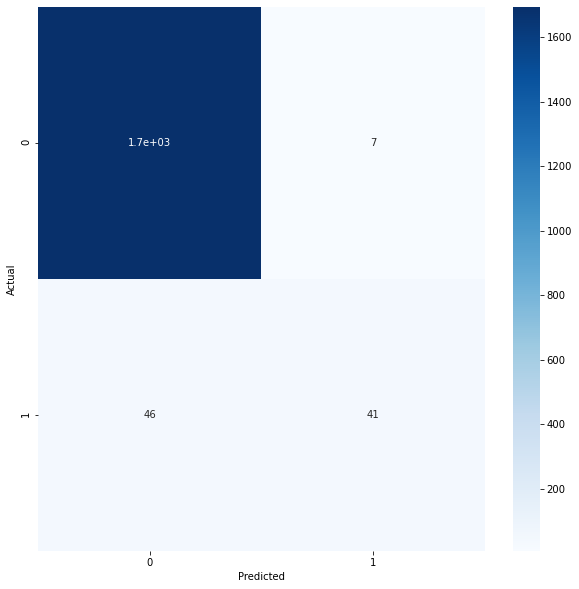

In [39]:
cm_cv = pd.DataFrame(Test_mat, index=[0,1], columns=[0,1])
cm_cv.index.name = 'Actual'
cm_cv.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
sns.heatmap(cm_cv,cmap= "Blues",annot = True )